In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import stats
import tqdm
import seaborn as sns
from collections import Counter

In [3]:
def genomic_inflation_plot(pvalues, binsize=.1):
    # expects numpy array of pvalues
    plt.figure(figsize=(7, 5))
    indices = ~np.isnan(pvalues) #& np.all(np.sum(all_allele_counts, axis=1)>100, axis=1)
    a = np.power(10.0, -np.arange(12, -binsize, -binsize))
    # hist
    ax = plt.subplot(1, 1, 1)
    n, bins, _ = plt.hist(np.clip(pvalues[indices], 10.0**(-20), None), 
                          bins=a, log=True, color='#8687d1')
    # theoretical - expect pvalues to follow a uniform distribution between 0-1
    exp = np.sum(indices)*(bins[1:]-bins[:-1])
    plt.plot(10**(binsize/2) * a[:-1][exp>1], exp[exp>1], color='black', linestyle='--', linewidth=2, label='theoretical')
    plt.xlabel('pvalue')
    plt.ylabel('Number of Sites')
    plt.title('Histogram of pvalues')
    plt.xscale('log')
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.plot([.05/len(pvals) for _ in exp[exp>1]], exp[exp>1], color='orange', linestyle='--', linewidth=2, label='bonferonni')
    plt.legend()
    plt.tight_layout()
    plt.show()


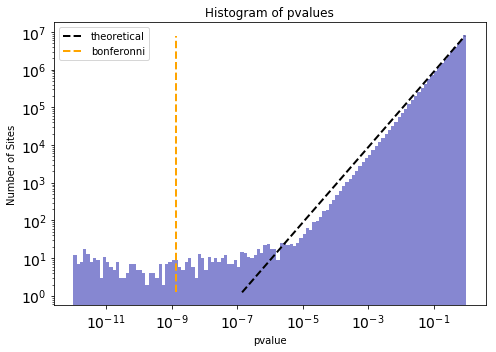

In [8]:
pileup_type='proper'
chrom=21
with open('/scratch/groups/dpwall/personal/briannac/unmapped_reads/results/pileups/%i.%s.pvals.tsv' % (chrom, pileup_type)) as my_csv:
    lines=my_csv.readlines()
loci = np.array([int(l) for l in lines[0].replace('\n', '').split(' ')])
pvals = np.array([float(l) for l in lines[1].replace('\n', '').split(' ')])
genomic_inflation_plot(pvals)

In [6]:
len(pvals)

37945695

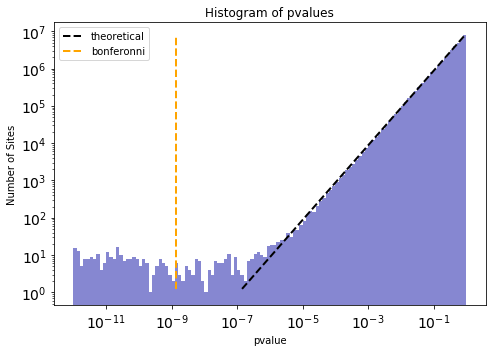

In [4]:
pileup_type='proper'
chrom=21
with open('/scratch/groups/dpwall/personal/briannac/unmapped_reads/results/pileups/%i.%s.pvals.tsv' % (chrom, pileup_type)) as my_csv:
    lines=my_csv.readlines()
loci = np.array([int(l) for l in lines[0].replace('\n', '').split(' ')])
pvals = np.array([float(l) for l in lines[1].replace('\n', '').split(' ')])
genomic_inflation_plot(pvals)

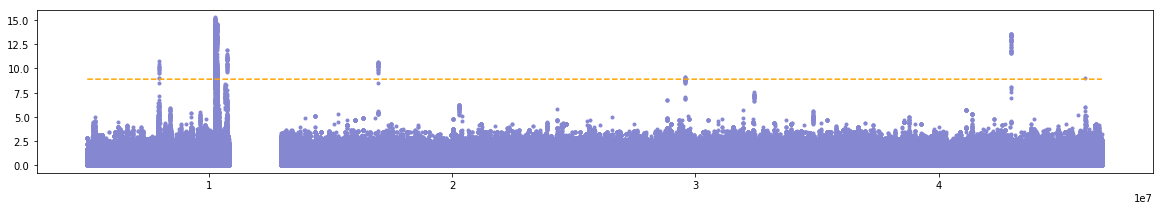

In [4]:
loci = np.array([int(l) for l in lines[0].replace('\n', '').split(' ')])
pvals = np.array([float(l) for l in lines[1].replace('\n', '').split(' ')])
plt.figure(figsize=(20,3))
plt.plot(loci, -np.log10(pvals), '.', color='#8687d1')
plt.plot(loci, [-np.log10(.05/len(pvals)) for i in loci],  '--', markersize=1, color='orange')

## Non-hits 
This is just to quickly compare, to make sure there's not some weird bias in pileup counts for males.

In [ ]:
chrom=21
pileup_type='improper'
with open('/scratch/groups/dpwall/personal/briannac/unmapped_reads/results/pileups/%i.%s.pvals.tsv' % (chrom, pileup_type)) as my_csv:
    lines=my_csv.readlines()
loci = np.array([int(l) for l in lines[0].replace('\n', '').split(' ')])
pvals = np.array([float(l) for l in lines[1].replace('\n', '').split(' ')])

In [ ]:
genomic_inflation_plot(pvals)

In [31]:
sig_lim=.05/len(pvals)
nonhits = loci[(pvals>sig_lim) & (pvals<.8)]
nonhits = nonhits[:-1][(nonhits[1:]-nonhits[:-1])>100]
if nonhits[-1]<(nonhits[-2]+100):
    nonhits = nonhits[:-1]
np.random.shuffle(nonhits)
nonhits=sorted(nonhits)
len(nonhits)

132

In [ ]:
array = [[] for h in nonhits]
array_idx=0

with open('/scratch/groups/dpwall/personal/briannac/unmapped_reads/results/pileups/%i.%s.tsv' % (chrom, pileup_type)) as f:
    for i, line in tqdm.tqdm(enumerate(f)):
        if i+1==nonhits[array_idx]:
            array[array_idx]=[float(f) for f in line.replace('\n', '').split('\t')]
            array_idx=array_idx+1
        if array_idx==len(nonhits):break

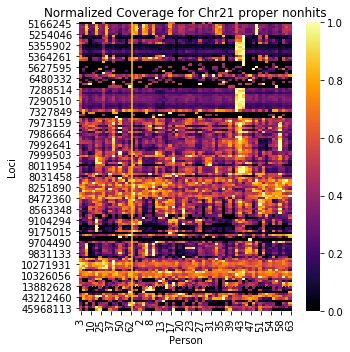

In [42]:
plt.figure(figsize=(5,5))
pileup_df = pd.DataFrame(array)
pileup_df = pd.concat([pileup_df[male_idx], pileup_df[female_idx]], axis=1)
pileup_df.index = nonhits
pileup_df_norm = pileup_df.apply(lambda x: x/max(x), axis=1)
sns.heatmap(pileup_df_norm, cmap='inferno')
plt.vlines(x=len(male_idx), ymin=0, ymax=len(pileup_df_norm), colors='gold')
plt.xlabel('Person')
plt.ylabel('Loci')
plt.title('Normalized Coverage for Chr%i %s nonhits' % (chrom, pileup_type))
plt.tight_layout()

Good, there is not too weird of a bias.

## Look at some examples
Let's look at sample 07C65106 (father) and 07C65103 (son) from same family.


In [28]:
chrom=21
pileup_type='improper'

In [24]:
bam_mappings = pd.read_csv('/scratch/groups/dpwall/personal/briannac/unmapped_reads/data/bam_mappings.csv', sep='\t')

In [4]:
bam_dir='/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/batch_00514'
bam_mappings = pd.read_csv('/scratch/groups/dpwall/personal/briannac/unmapped_reads/data/bam_mappings.csv', sep='\t')
bam_mappings.index = bam_mappings.sample_id
samples = [a.split('/')[-2] for a in glob.glob(bam_dir +'/*/')]
print(samples[2])
print(bam_mappings.loc[samples[2]].sex_numeric)

07C65106
1.0


In [ ]:
with open('/scratch/groups/dpwall/personal/briannac/unmapped_reads/results/pileups/%i.%s.pvals.tsv' % (chrom, pileup_type)) as my_csv:
    lines=my_csv.readlines()
loci = np.array([int(l) for l in lines[0].replace('\n', '').split(' ')])
pvals = np.array([float(l) for l in lines[1].replace('\n', '').split(' ')])

In [72]:
print((chrom, pileup_type))

(21, 'improper')


In [52]:
hits = loci[pvals<(.05/len(pvals))]
interval = 1000
hits = np.concatenate([[-1-interval], hits, [hits[-1]+interval+1]])
hits1 = hits[1:-1][(abs(hits[1:-1]-hits[2:])<=interval) & (abs(hits[1:-1]-hits[:-2])>interval)]
hits2 = hits[1:-1][(abs(hits[1:-1]-hits[2:])>interval) & (abs(hits[1:-1]-hits[:-2])<=interval)]
idx = np.array((hits2-hits1)>50)
hits1=hits1[idx]
hits2=hits2[idx]
#if hits[-1]<(hits[-2]+1000):
#    hits = hits[:-1]
#interval

In [73]:
pd.DataFrame([hits1, hits2])

,0,1,2,3,4,5,6,7,8,9,10,11
0,7938933,10269865,10324344,10726870,10735533,16972901,20287879,23881883,28841230,31858030,34849382,42957478
1,7939022,10274273,10326404,10726922,10736559,16972963,20288898,23881975,28841311,31858123,34849437,42957572


In [121]:
%%bash
sample=07C65103
start=10735533
stop=10736559


samtools view -F 0x2 -F 0x400 -F 0x200 /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/batch_00514/$sample.final.cram chr21:$start-$stop -b | samtools bam2fq  > test_$sample.fastq
source ~/.bash_profile
\rm -r test_$sample
megahit -r test_$sample.fastq -o test_$sample

sample=07C65106
samtools view -F 0x2 -F 0x400 -F 0x200 /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/batch_00514/$sample.final.cram chr21:$start-$stop -b | samtools bam2fq  > test_$sample.fastq
source ~/.bash_profile
\rm -r test_$sample
megahit -r test_$sample.fastq -o test_$sample


less test_07C65103/final.contigs.fa
less test_07C65106/final.contigs.fa

[M::bam2fq_mainloop] discarded 0 singletons
[M::bam2fq_mainloop] processed 511 reads
/home/users/briannac/.bash_aliases: line 5: PI_SCRATCH: readonly variable
2020-10-07 16:37:36 - MEGAHIT v1.2.9
2020-10-07 16:37:36 - Using megahit_core with POPCNT support
2020-10-07 16:37:36 - Convert reads to binary library
2020-10-07 16:37:36 - b'INFO  sequence/io/sequence_lib.cpp  :   77 - Lib 0 (/scratch/groups/dpwall/personal/briannac/unmapped_reads/test_07C65103.fastq): se, 511 reads, 151 max length'
2020-10-07 16:37:36 - b'INFO  utils/utils.h                 :  152 - Real: 0.0036\tuser: 0.0012\tsys: 0.0012\tmaxrss: 7248'
2020-10-07 16:37:36 - k-max reset to: 141 
2020-10-07 16:37:36 - Start assembly. Number of CPU threads 16 
2020-10-07 16:37:36 - k list: 21,29,39,59,79,99,119,141 
2020-10-07 16:37:36 - Memory used: 121477961318
2020-10-07 16:37:36 - Extract solid (k+1)-mers for k = 21 
2020-10-07 16:37:37 - Build graph for k = 21 
2020-10-07 16:37:37 - Assemble contigs from SdBG for k = 21
202

In [122]:
%%bash
less test_07C65103/final.contigs.fa
less test_07C65106/final.contigs.fa

>k39_1 flag=1 multi=20.9653 len=212
ATTCCATTCCATTCTATTCCATGTCACTCAACTCCATTCCATTCCACTCCACCACTTTCCATTCTATTCCATTCCATTCCACTCCACTAAATTCCATCCCATTCCACTGCACTCTGATCCTCTCCAGTCAAATCCACTCCTCTCCACTCCACTACATTCCGTTTTTTTGAATTCCATTCTATTCCATTCCATTCCGTTTCAATCCATTTCAT
>k39_22 flag=1 multi=2.4636 len=259
GGAATCGAATGGCATCAAATGGAATTGAAAGGAATGCGGTGAAGTGGAGTAAAGTGGGTTGAAATGGAGTGGAATGGAATGTGGAGGAATGGAATTGAATGGAGTGGAGTCGAGTTGAGGGGAATGAAGTGGAATGGAAAGGAATAGGAATGATTGGAATTGAAAGGAGTGGAGTGGAGTGGAATGCAATGGAATGGAATCATCCGGAATGTAATGGAATAGAATGGAATGGAAAGGAATAAACACGAGTGCAAAGGAA
>k39_23 flag=1 multi=10.5493 len=343
TTCCATTCCATTGCATTCCACTCTACTCCTCGGCACTCCACTCCACTCCACTCCATTCAATTCCATTCTATTGCTTTCCACTCCAATCCACTACGTTCAATTCCATTCCTTCTCATTCCATACCATTCAACTCCATTCCACTCCACTCCACTCCACTCTATTCAATTCCATGTCTCCCCATTCGATTCCACTCCATTTAAATCCACTCCACTCCACTTTACCGCATTCCTTTCAATTCCACTGGATGACATTCAACTCCATTCGATTCATTCCTTTTAATTTCTTTCGATTTCTTTTTTCCATTCGATTTCACTCAATTCTATATGATTCGATTCTATTCGAT
>k39_14 flag=1 multi=14.0000 len=206
CAAATGTCATCAAATGGAATCCAAAAGAATGCAATGA

In [61]:
def filter_table(idx, my_filter):
    print(idx)
    df = pd.read_csv(bam_dir + '/%s/%s.final_alignment_table.csv' % (idx,idx))
    df['sample_id']=idx
    return df[my_filter(df)]    
alignments = [filter_table(idx, lambda x:
                           ((x.R1_ref==('chr%i' % chrom))| 
                            (x.R2_ref==('chr%i' % chrom))) & (x.is_proper_pair==(pileup_type=='proper'))) for idx in ['07C65106','07C65103']] # From a male sample
alignments = pd.concat(alignments)
alignments.R1_start = [int(i) if (~pd.isna(i) & (i!='unmapped')) else -1 for i in alignments.R1_start]
alignments.R2_start = [int(i) if (~pd.isna(i) & (i!='unmapped')) else -1 for i in alignments.R2_start]

07C65106


/home/users/briannac/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (2,4,6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


07C65103


In [133]:
pos=hits[4]
print(pos)

10274273


[('BACT_577|gi|224473368|ref|NZ_ACDH01000101.1|', 1491), ('chr21', 294), ('chrUn_JTFH01001512v1_decoy', 166), ('chr22', 165), ('chrUn_JTFH01001506v1_decoy', 139)]


,Unnamed: 0,R1_ref,R1_start,R1_MAPQ,R1_is_reverse,R2_ref,R2_start,R2_MAPQ,R2_is_reverse,is_proper_pair,sample_id
2098527,E00218:135:H7WT7CCXX:6:2111:23939:31107,chr21,10273350,0.0,True,chr8,112911797,0.0,True,False,07C65106
2098683,E00218:135:H7WT7CCXX:8:1219:26405:52503,chr21,10273350,29.0,True,BACT_769|gi|223714005|gb|ACDT01000210.1|,0,60.0,False,False,07C65106
2098934,E00218:135:H7WT7CCXX:1:1106:3740:31705,chr21,10273350,24.0,True,chrUn_JTFH01001512v1_decoy,520,21.0,True,False,07C65106
2099003,E00218:135:H7WT7CCXX:7:1218:2360:71929,chr21,10273350,24.0,True,chr11,87098657,0.0,True,False,07C65106
2100470,E00218:135:H7WT7CCXX:1:1112:32850:14125,chr21,10273350,49.0,True,chrUn_JTFH01001512v1_decoy,460,22.0,True,False,07C65106
...,...,...,...,...,...,...,...,...,...,...,...
8833546,E00218:135:H7WT7CCXX:8:2113:19148:38597,chr21,10274107,0.0,True,chrUn_JTFH01001987v1_decoy,1694,5.0,False,False,07C65106
10072810,E00218:135:H7WT7CCXX:1:2201:4806:45752,chr21,10273450,0.0,False,BACT_577|gi|224473368|ref|NZ_ACDH01000101.1|,394,0.0,False,False,07C65106
10072811,E00218:135:H7WT7CCXX:4:2207:25705:61521,chr21,10273952,2.0,True,unmapped,-1,NaN,NaN,False,07C65106
10072812,E00218:135:H7WT7CCXX:6:1221:23898:8816,chr21,10273982,0.0,False,unmapped,-1,NaN,NaN,False,07C65106


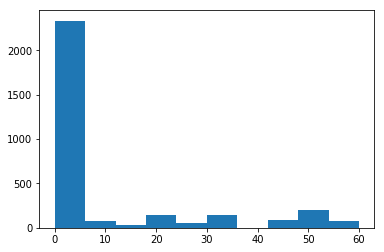

In [134]:
r1_alignments = alignments[((alignments.R1_ref==('chr%i' %chrom)) & (alignments.R1_start>(pos-1000)) &  (alignments.R1_start<(pos+1000)))]
print(Counter(r1_alignments.R2_ref).most_common(5))
plt.hist(r1_alignments.R1_MAPQ)
r1_alignments

[('chr13', 1663), ('chr21', 830), ('chr22', 692), ('chrUn_JTFH01001680v1_decoy', 469), ('BACT_577|gi|224473368|ref|NZ_ACDH01000101.1|', 286)]


,Unnamed: 0,R1_ref,R1_start,R1_MAPQ,R1_is_reverse,R2_ref,R2_start,R2_MAPQ,R2_is_reverse,is_proper_pair,sample_id
2205,E00218:135:H7WT7CCXX:5:2106:4369:42464,chr2,167466776,5.0,False,chr21,10270282,0.0,False,False,07C65106
6668,E00218:135:H7WT7CCXX:6:1111:30069:51079,chr21,10272374,31.0,True,chr21,10270257,5.0,False,False,07C65106
6675,E00218:135:H7WT7CCXX:3:2105:19006:22634,chr21,42957500,0.0,True,chr21,10270263,0.0,False,False,07C65106
6677,E00218:135:H7WT7CCXX:5:1212:2725:50622,chr21,10272414,30.0,True,chr21,10270283,0.0,False,False,07C65106
6679,E00218:135:H7WT7CCXX:5:2202:18722:4596,chr21,10272405,17.0,True,chr21,10270283,0.0,False,False,07C65106
...,...,...,...,...,...,...,...,...,...,...,...
8829494,E00218:135:H7WT7CCXX:7:1203:17859:12595,chrUn_JTFH01001987v1_decoy,315,31.0,True,chr21,10270245,13.0,False,False,07C65106
8829559,E00218:135:H7WT7CCXX:6:2220:14651:26167,chrUn_JTFH01001987v1_decoy,319,17.0,True,chr21,10270239,3.0,False,False,07C65106
8829623,E00218:135:H7WT7CCXX:4:1212:19290:3963,chrUn_JTFH01001987v1_decoy,323,13.0,True,chr21,10270260,13.0,False,False,07C65106
8830657,E00218:135:H7WT7CCXX:4:2108:16093:54261,chrUn_JTFH01001987v1_decoy,425,0.0,True,chr21,10270579,0.0,False,False,07C65106


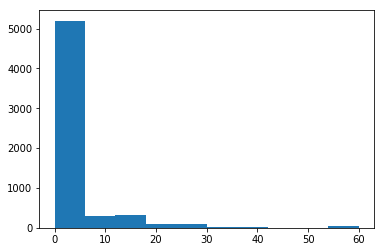

In [66]:
r2_alignments = alignments[((alignments.R2_ref==('chr%i' %chrom)) & (alignments.R2_start>(pos-1000)) &  (alignments.R2_start<(pos+1000)))]
print(Counter(r2_alignments.R1_ref).most_common(5))
plt.hist(r2_alignments.R2_MAPQ)
r2_alignments

# Plot distribution of mapping qualities

In [2]:
alignments.race

NameError: name 'alignments' is not defined